#### Let's have some fun with replicating uncertainties
#### Grab a random medium-sized glacier, RGI60-02.04403

In [1]:
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
from pyproj import Transformer

In [2]:
file_name = 'RGI60-02.04403_thickness.tif'
with rio.open(file_name) as src:
            thickness = src.read(1)
            height = thickness.shape[0]
            width = thickness.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rio.transform.xy(src.transform, rows, cols)
            lons= np.array(xs)
            lats = np.array(ys)
thickness[thickness == 0] = 'nan'

transformer = Transformer.from_crs("WGS 84 / UTM zone 10N", "EPSG:4326")
lons, lats = transformer.transform(lons,lats)
# something gets scrambled here, reassign lat/lon
long = lats
lat = lons

fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = thickness, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\mu$ = ' + str(np.mean(np.unique(thickness[~np.isnan(thickness)]))) + ' m',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

#### Okay, Millan says " On average, errors for ice thickness greater than 100 m are in the range of 25–35%. For ice thicknesses below 100 m, we assume error >50%." So let's do that

In [19]:
t = np.where(thickness > 100, thickness * 0.3, thickness)
t = np.where(thickness < 100, thickness * 0.5, t)

Text(0.5, 1.0, 'RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = 64917\n$\\mu$ = 122.046165 m')

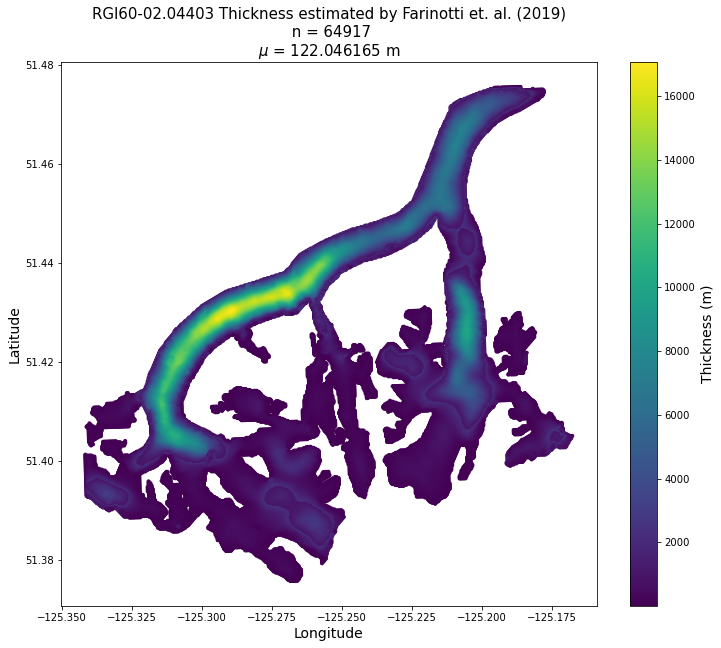

In [20]:
fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = t**2, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\mu$ = ' + str(np.mean(np.unique(thickness[~np.isnan(thickness)]))) + ' m',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [24]:
np.sqrt(np.nanmean(t**2)) / np.nanmean(thickness) * 100

41.92990958690643

#### okay, mean thickness uncertainty of about 42%. Let's try a bigger glacier.

In [ ]:
file_name = 'RGI60-05.10315_thickness.tif'
with rio.open(file_name) as src:
            thickness = src.read(1)
            height = thickness.shape[0]
            width = thickness.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rio.transform.xy(src.transform, rows, cols)
            lons= np.array(xs)
            lats = np.array(ys)
thickness[thickness == 0] = 'nan'

transformer = Transformer.from_crs("WGS 84 / UTM zone 10N", "EPSG:4326")
lons, lats = transformer.transform(lons,lats)
# something gets scrambled here, reassign lat/lon
long = lats
lat = lons

fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = thickness, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\mu$ = ' + str(np.mean(np.unique(thickness[~np.isnan(thickness)]))) + ' m',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [ ]:
file_name = 'RGI60-19.02748_thickness.tif'
with rio.open(file_name) as src:
            thickness = src.read(1)
            height = thickness.shape[0]
            width = thickness.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rio.transform.xy(src.transform, rows, cols)
            lons= np.array(xs)
            lats = np.array(ys)
thickness[thickness == 0] = 'nan'

transformer = Transformer.from_crs("WGS 84 / UTM zone 10N", "EPSG:4326")
lons, lats = transformer.transform(lons,lats)
# something gets scrambled here, reassign lat/lon
long = lats
lat = lons

fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = thickness, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\mu$ = ' + str(np.mean(np.unique(thickness[~np.isnan(thickness)]))) + ' m',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [ ]:
# import pandas as pd
# df = pd.read_csv('quick_csv.csv')
# h = str(df['WT1'].values[0])
# fig = plt.figure(figsize = (12,10))
# fig.patch.set_color('w')
# plt.scatter(long, lat, marker = '.', color = 'w'
# #             c = thickness, cmap = 'viridis',
#            )
# plt.scatter(df['CenLon'],df['CenLat'],c = df['WT1'],cmap = 'viridis')
# # plt.scatter(
# #     #     x = 51.386451,
# #     #     x = ,
# #         x = -125.257967,
# #         y = 51.386451,
# #         marker = 'x',
# #         color = 'red'
# #     )
# # plt.scatter(
# #         x = -125.257967,
# #         y = 51.386451,
# #         marker = 'x',
# #         color = 'red'
# #     )
# fig.patch.set_color('w')
# cb = plt.colorbar()
# cb.set_label(label='Thickness',size = 14)
# plt.ylabel('Latitude',fontsize = 14)
# plt.xlabel('Longitude',fontsize = 14)
# plt.title('RGI60-02.04403 Thickness estimated by this study\n n = ' + 
#           '1'+'\n' + 
#           '$\mu$ = ' + h + ' m',
#           fontsize = 15)# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [ ]:
# import pandas as pd
# df = pd.read_csv('quick_csv.csv')
# h = (np.round((df['WB1']**2 + df['WEU1']**2).values[0], 2))
# fig = plt.figure(figsize = (12,10))
# fig.patch.set_color('w')
# plt.scatter(long, lat, marker = '.', color = 'w'
# #             c = thickness, cmap = 'viridis',
#            )
# plt.scatter(df['CenLon'],df['CenLat'],c = h,cmap = 'viridis')
# # plt.scatter(
# #     #     x = 51.386451,
# #     #     x = ,
# #         x = -125.257967,
# #         y = 51.386451,
# #         marker = 'x',
# #         color = 'red'
# #     )
# # plt.scatter(
# #         x = -125.257967,
# #         y = 51.386451,
# #         marker = 'x',
# #         color = 'red'
# #     )
# fig.patch.set_color('w')
# cb = plt.colorbar()
# cb.set_label(label='Thickness Uncertainty $\sigma^2 (m^2)$',size = 14)
# plt.ylabel('Latitude',fontsize = 14)
# plt.xlabel('Longitude',fontsize = 14)
# plt.title('RGI60-02.04403 Thickness uncertainty estimated by this study\n n = ' + 
#           '1'+'\n' + 
#           '$\sqrt{\mu}$ = ' + str(np.round(np.sqrt(h),2)) + ' m',
#           fontsize = 15)# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
h = (thickness*0.35)**2
plt.scatter(long, lat, marker = '.', 
            c = h, cmap = 'viridis',
           )
# plt.scatter(
#     #     x = 51.386451,
#     #     x = ,
#         x = -125.257967,
#         y = 51.386451,
#         marker = 'x',
#         color = 'red'
#     )
# plt.scatter(
#         x = -125.257967,
#         y = 51.386451,
#         marker = 'x',
#         color = 'red'
#     )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness Uncertainty $\sigma^2 (m^2)$',size = 14)
plt.ylabel('Latitude', fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
unc = str(np.round(np.sqrt(np.mean(np.unique(h[~np.isnan(h)]))),2))
plt.title('RGI60-02.04403 Thickness uncertainty estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\sqrt{\mu}$ = ' + unc + ' m',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [ ]:
57/122

In [ ]:
# draw a circle around the site and determine lat lon boundaries from the circle extrema


from pyproj import CRS, Transformer
from shapely.geometry import Point
from shapely.ops import transform


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = CRS.from_proj4(
        f"+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0"
    )
    tfmr = Transformer.from_proj(aeqd_proj, aeqd_proj.geodetic_crs)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(tfmr.transform, buf).exterior.coords[:]
b = geodesic_point_buffer(51.386451, -125.257967, 1)

north = 0
south = 90
east = -130
west = -120

for item in b:
    y = item[1]
    x = item[0]

    if y > north:
        north = y
    if y < south:
        south = y
        
    if x < west:
        west = x
    if x > east:
        east = x
        
print(f'north boundary = {north}')
print(f'south boundary = {south}')
print(f'east boundary = {east}')
print(f'west boundary = {west}')

In [ ]:
longs = long[
    np.where(
        (long>west)&(long<east)&(lat>south)&(lat<north)
    )
]
np.shape(longs)

latt = lat[
    np.where(
        (long>west)&(long<east)&(lat>south)&(lat<north)
    )
]
np.shape(latt)

thick = thickness[
    np.where(
        (long>west)&(long<east)&(lat>south)&(lat<north)
    )
]

fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(longs,latt,
            c = thick, cmap = 'viridis',marker = 'o',
#             vmin = thick.min(), vmax = thick.max(),
           )
plt.scatter(
        x = -125.257967,
        y = 51.386451,
        marker = 'x',
        color = 'red'
    )
fig.patch.set_color('w')
plt.colorbar(label = 'Thickness (m)')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.clim((np.nanmin(thick), np.nanmax(thick)))

# plt.colorbar(mappable = range(thick.min(),thick.max(),len(thick)),label = 'Thickness (m)')